# CS 418 STRAWHATS


Akhil Abraham, Akhila Abraham, Amal Johnson, Vishal Patel, Gineesh Pillai

# Introduction

Our team is analyzing Chicago Crimes Data to understand the different kinds of crimes in our communities. We are also trying to understand the econmoic factors that contribute to crime by looking at a SocioEconomic Indicator data set. By merging the above two data sets, we hope to get a better understanding of how crime is affected by the various socioeconomic factors particularly employement and income. 


# Changes

When first starting the project, our group wanted to use the Crimes data set along with CTA Lstops data set to find crimes around CTA stops. After spending several weeks and trying to find a valid common data to be merged on, we realized that merging these two datasets is near impossible. Our group then decided to use our SocioEconomic data set with crimes as they both share columns where the data can be compared and matched with. 

# Data cleaning

The Crimes Data set had about 8 million rows and was extremely large. In order to narrow this down and let this match with our SocioEconomic data set, we filtered the year to start from 2008. The years for both the data sets are from 2008-2020 We also made sure to remove null values and delete a few unwanted columns from both the data sets. The SocioEconomic data set didn't need a lot of removal of the columns. We merged Crime data set along with our SocioEconomic data set leading to about 4million rows worth of data. After Data cleaning, we were able to get 12 years worth of valid data. Some of the columns from the final merged dataframe, we see the locations, descriptions, Arrest along with the community of where these occured. We are also able to see the population, education and income information from the merged data. 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [41]:
crimesData = pd.read_csv("Crimes2001_present.csv")
dropData=crimesData.drop(columns=['FBI Code','Updated On','X Coordinate','Y Coordinate','Longitude','Latitude','Location','Beat','IUCR','Case Number','Date','Ward','District'])
dropData = dropData[dropData['Location Description'].notna()]
start_year=2007
mask = (dropData['Year'] > start_year)
crimeData= dropData.loc[mask]
crimeData.tail()

,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year
7099882,11703089,021XX W GRACE ST,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER,False,False,5.0,2019
7099883,11700926,036XX W DOUGLAS BLVD,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,29.0,2019
7099884,24560,013XX W HASTINGS ST,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,28.0,2019
7099885,24559,013XX W HASTINGS ST,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,28.0,2019
7099887,11707239,022XX S KOSTNER AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,29.0,2017


In [5]:
rawSocio = pd.read_csv("socioecon.csv")
rawSocio=rawSocio.drop(columns=['HARDSHIP INDEX'])
rawSocio = rawSocio.rename(columns={'Community Area Number': 'Community Area'})
rawSocio = rawSocio[rawSocio['Community Area'].notna()]
rawSocio.tail()

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385


In [30]:
mergedData=pd.merge(crimeData, rawSocio, how='left', on='Community Area')
mergedData.tail()

,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME
3836737,11703089,021XX W GRACE ST,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER,False,False,5.0,2019,North Center,0.3,7.5,5.2,4.5,26.2,57123.0
3836738,11700926,036XX W DOUGLAS BLVD,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,29.0,2019,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034.0
3836739,24560,013XX W HASTINGS ST,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,28.0,2019,Near West Side,3.8,20.6,10.7,9.6,22.2,44689.0
3836740,24559,013XX W HASTINGS ST,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,28.0,2019,Near West Side,3.8,20.6,10.7,9.6,22.2,44689.0
3836741,11707239,022XX S KOSTNER AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,29.0,2017,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034.0


# Visualization

# Crimes are mostly evenly distributed throughout the community

In order to get a basic understanding, a barplot has been plotted to show different Community Areas across chicago along with the percent of households that is below Poverty. It seems as if there is about an equal distribution of crime throughout with some communites higher than a few others. 

Text(0.5, 0.98, 'Community Area vs Percent Households Below Poverty ')

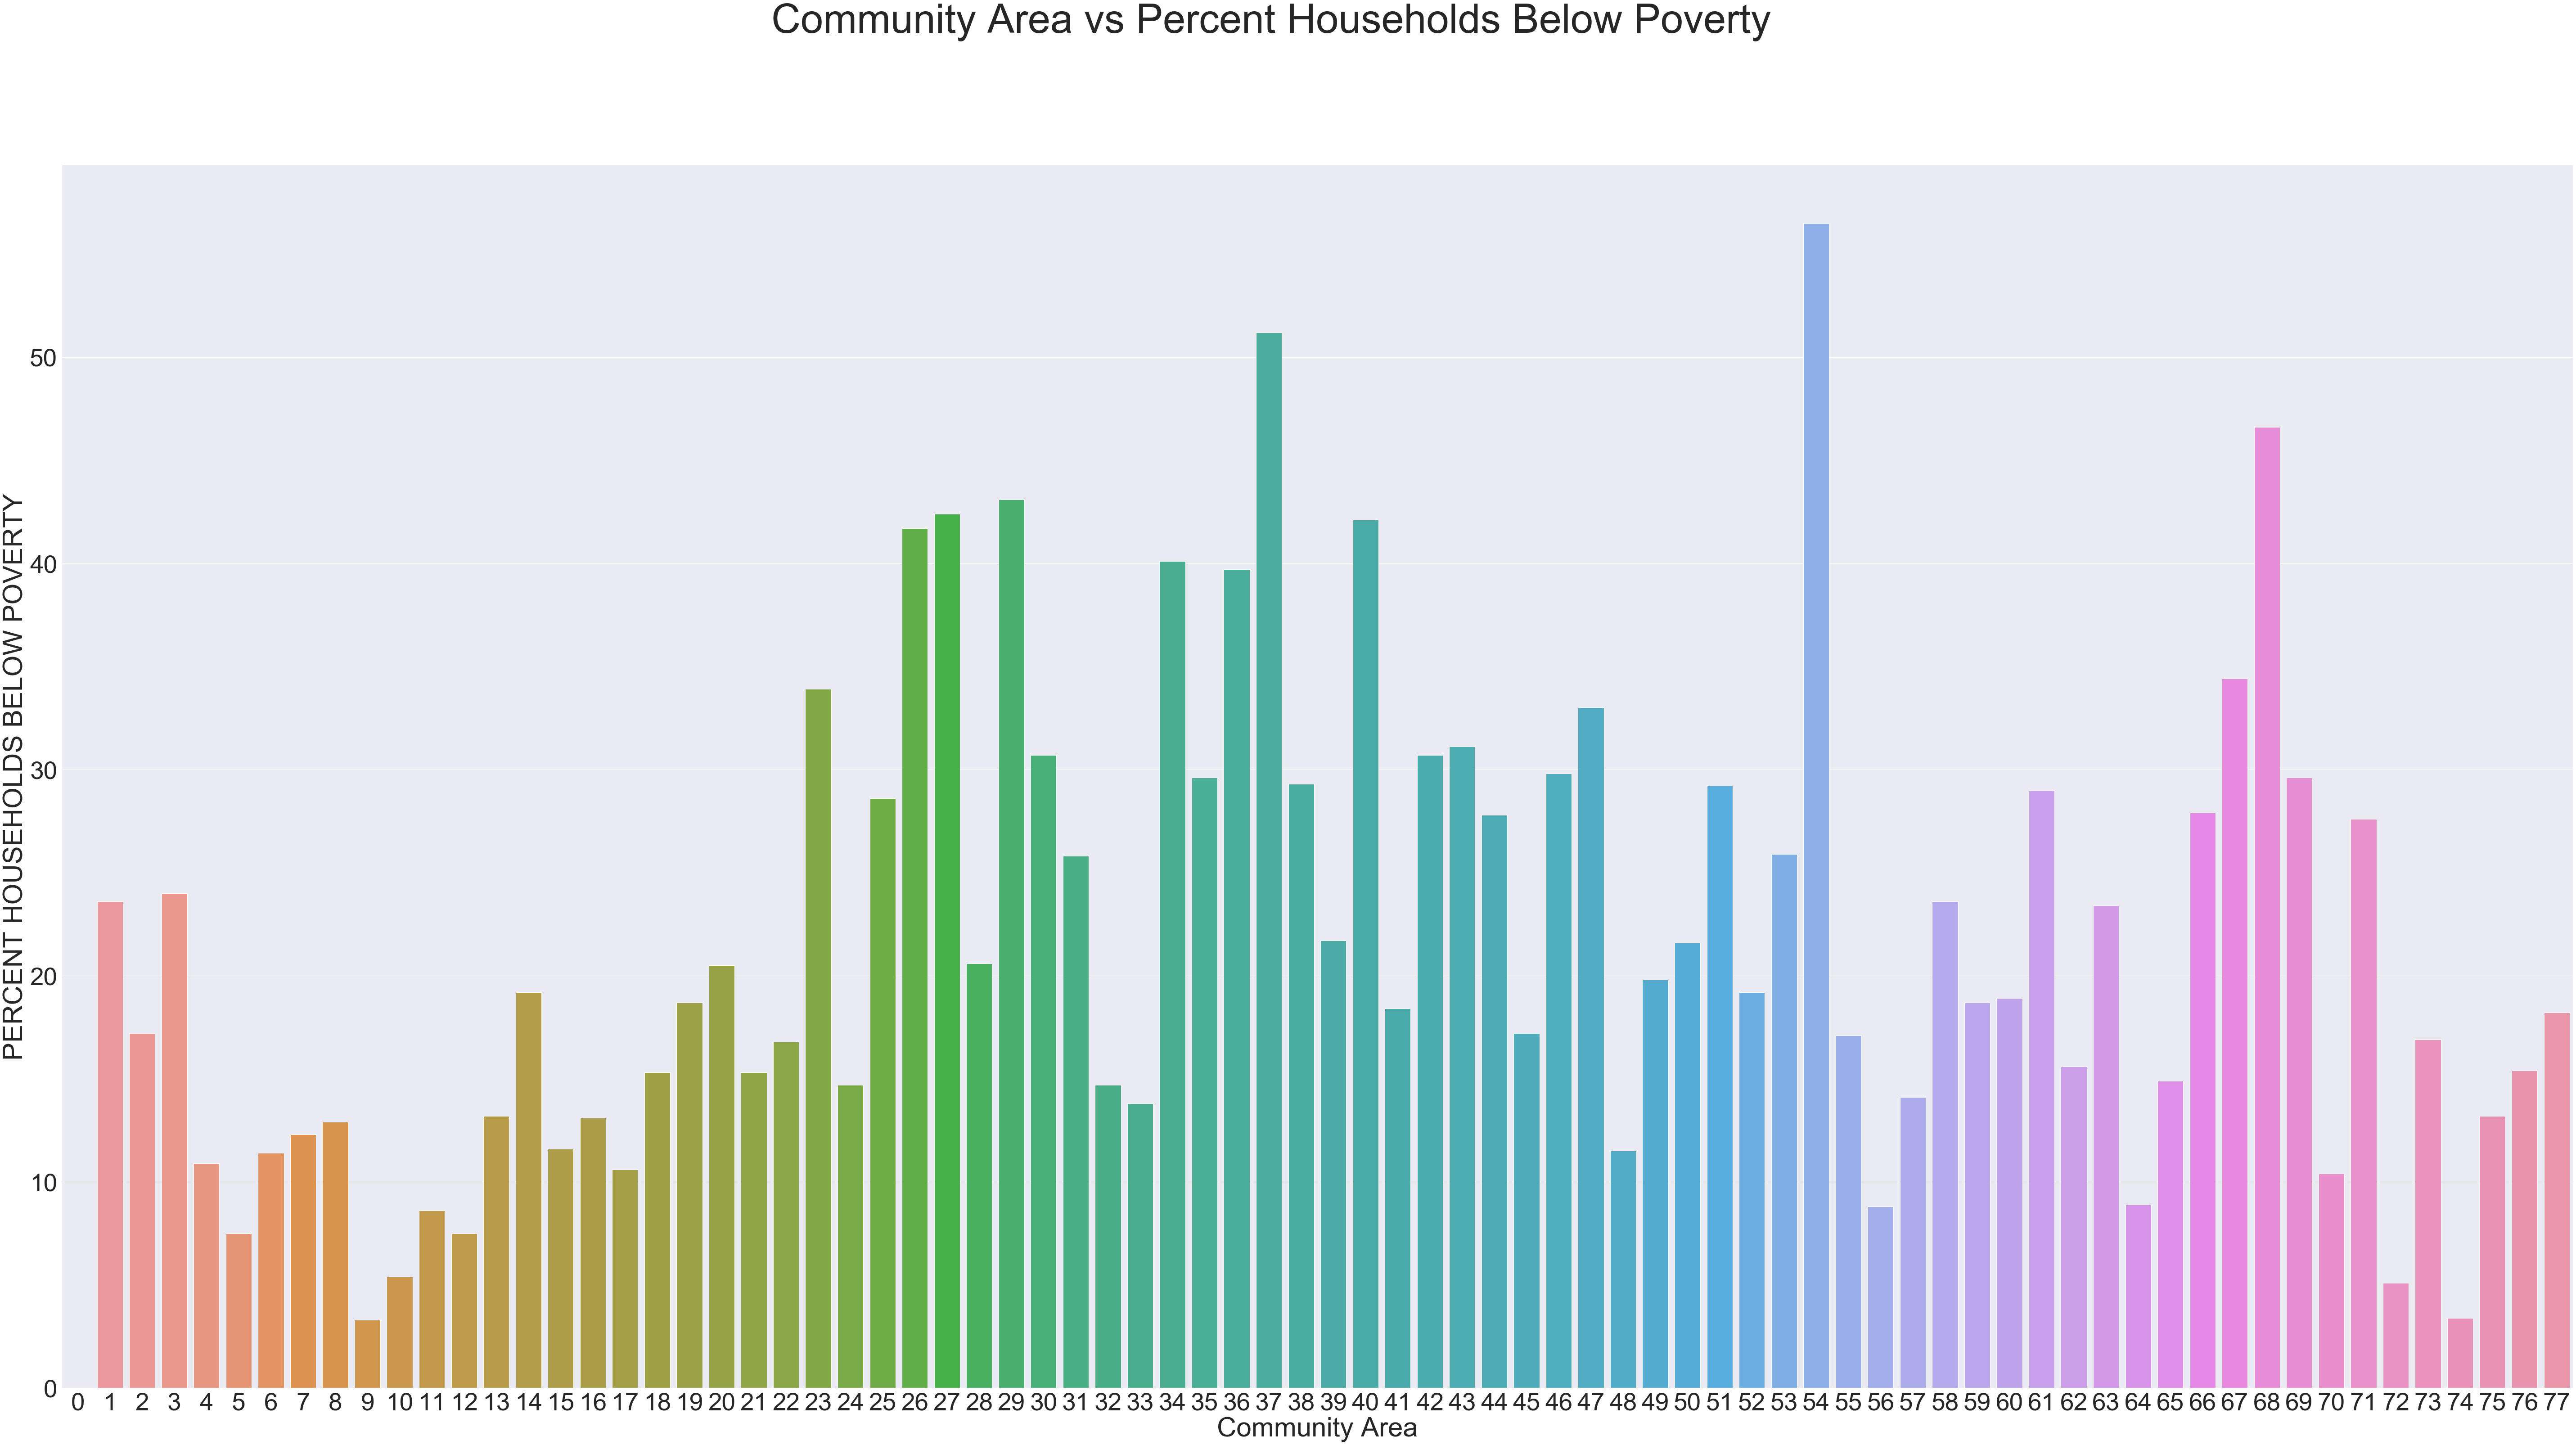

In [27]:
groups = mergedData.groupby(['Community Area']).mean().reset_index()
groups = groups.astype({'Community Area': int})
ax = sns.barplot(x="Community Area",y="PERCENT HOUSEHOLDS BELOW POVERTY", data=groups)
sns.set(rc={'figure.figsize':(100,50)})
sns.set(font_scale = 8)
plt.suptitle('Community Area vs Percent Households Below Poverty ', fontsize=90)

# Machine Learning

In [ ]:
X = mergedData['PER CAPITA INCOME '].values.reshape(-1, 1)
crimecnt = mergedData.groupby('Community Area').count()['ID'].reset_index(name="Crime Count")
y = crimecnt['Crime Count'].values
plt.scatter(X, y,  color='Blue')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.title('Income v. Crime Count', size=20)
plt.xticks()
plt.yticks()
plt.xlabel('Per Capita Income')
plt.ylabel('Crime Count')
plt.show()

# Reflection

The hardest part for our group has been to find usable data well enough to analyze and merge together. Just finding data took us a couple of weeks and we had to go back and forth with this. 
Our initial insights is that lower income communites have more crime rates and that Unemployment leads to increased crime rates as well. At this point, if we were to plot Income versus crime count, we should be able to see that our hypothesis matches. Going forward, our group will have to dedicate more time to explore the data and create relationships as we spent most of our time trying to find valid data. We made a very good decision in changing our data set to socioEconomic, as now we have valuable valid information. 

# Next Steps

In the next few weeks, our group will work on creating more visualizations exploring the different relationships between the above merged data and use Machine Learning to see whether our hypothesis is accurate. If we can show clear relationships between crime and other social economic factors, we will consider out project to have achieved its goals. 